In [2]:
get_ipython().magic('pylab inline')

Populating the interactive namespace from numpy and matplotlib


In [9]:
import sys
import csv
import math
import folium
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geojson
from scipy import stats

%matplotlib inline
data4 = pd.read_csv("/home/elena/Documents/DataMining/Data/ElectionData/file_part_01.csv")
data5 = pd.read_csv("/home/elena/Documents/DataMining/Data/CleanedCSVs/2009Cluster.csv")
data6 = pd.read_csv("/home/elena/Downloads/us_postal_codes.csv")



In [5]:
data4.head(6)


,year,state,county,fips,vote_rep,vote_dem,vote_oth,vote_total,pct_rep,pct_dem,pct_oth,winner,runnerup,pct_winner,margin_winner_over_runnerup
0,2008,AL,Autauga County,1001,17403,6093,145,23641,73.6,25.8,0.6,rep,dem,73.6,47.8
1,2008,AL,Baldwin County,1003,61271,19386,756,81413,75.3,23.8,0.9,rep,dem,75.3,51.5
2,2008,AL,Barbour County,1005,5866,5697,67,11630,50.4,49.0,0.6,rep,dem,50.4,1.4
3,2008,AL,Bibb County,1007,6262,2299,83,8644,72.4,26.6,1.0,rep,dem,72.4,45.8
4,2008,AL,Blount County,1009,20389,3522,356,24267,84.0,14.5,1.5,rep,dem,84.0,69.5
5,2008,AL,Bullock County,1011,1391,4011,13,5415,25.7,74.1,0.2,dem,rep,74.1,48.4


In [7]:
data5.head()

,zipcode,latitude,longitude,avg_agi,Cluster
0,35004.0,33.601525,-86.489546,3.084004,2
1,35005.0,33.604745,-87.042439,2.785734,1
2,35006.0,33.429346,-87.202099,2.885881,1
3,35007.0,33.228822,-86.791901,3.262145,4
4,35010.0,32.944644,-85.910009,2.642072,1


In [10]:
data4.margin_winner_over_runnerup.describe()

count    3114.000000
mean       25.906827
std        18.180689
min         0.000000
25%        10.700000
50%        22.720000
75%        38.310000
max        87.730000
Name: margin_winner_over_runnerup, dtype: float64

In [11]:
data6 = data6.rename(columns={'Zip Code': 'zipcode'})
data6 = data6.rename(columns={'State': 'state'})
data6.head()

,zipcode,Place Name,state,State Abbreviation,County,Latitude,Longitude
0,501,Holtsville,New York,NY,Suffolk,40.8154,-73.0451
1,544,Holtsville,New York,NY,Suffolk,40.8154,-73.0451
2,1001,Agawam,Massachusetts,MA,Hampden,42.0702,-72.6227
3,1002,Amherst,Massachusetts,MA,Hampshire,42.3671,-72.4646
4,1003,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248


In [12]:
left = data5
right = data6 
#result = left.join(right, on='zipcode')
result = data5.merge(data6, on='zipcode', how='left')
result.head()

,zipcode,latitude,longitude,avg_agi,Cluster,Place Name,state,State Abbreviation,County,Latitude,Longitude
0,35004,33.601525,-86.489546,2.388274,0,Moody,Alabama,AL,St. Clair,33.6035,-86.4668
1,35005,33.604745,-87.042439,1.970332,2,Adamsville,Alabama,AL,Jefferson,33.5884,-86.9597
2,35006,33.429346,-87.202099,2.188307,3,Adger,Alabama,AL,Jefferson,33.4343,-87.1675
3,35007,33.228822,-86.791901,2.451653,0,Alabaster,Alabama,AL,Shelby,33.1934,-86.7944
4,35010,32.944644,-85.910009,1.850111,2,Alexander City,Alabama,AL,Tallapoosa,32.9164,-85.9368


In [13]:
clusterState = pd.DataFrame(result.groupby('state').agg(lambda x:x.value_counts().index[0]))
clusterState.head() 

,zipcode,latitude,longitude,avg_agi,Cluster,Place Name,State Abbreviation,County,Latitude,Longitude
state,,,,,,,,,,
Alabama,36863.0,34.563532,-86.761749,2.128571,2,Birmingham,AL,Jefferson,32.3053,-86.8346
Arizona,85501.0,33.466041,-111.022196,1.928504,2,Phoenix,AZ,Maricopa,33.4321,-112.0893
Arkansas,72703.0,33.187242,-94.212834,1.882353,2,Little Rock,AR,Pulaski,33.1213,-93.2897
California,92056.0,34.063145,-118.352039,2.000000,0,Los Angeles,CA,Los Angeles,34.1510,-122.2804
Colorado,81122.0,40.439822,-102.163272,1.490654,3,Denver,CO,El Paso,39.1032,-105.0109


In [14]:
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  break_points = [minval] + cut_points + [maxval]

  if not labels:
    labels = range(len(cut_points)+1)
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

cut_points = [13,39]
labels = ["low","medium","high"]
data4["Homogeny"] = binning(data4["margin_winner_over_runnerup"], cut_points, labels = ["low","medium","high"])
pd.value_counts(marginData["margin_winner_over_runnerup"], sort=False)
data4.Homogeny.apply(str)
data4.head()

NameError: name 'marginData' is not defined

In [15]:
polarity = []


# For each row in the column,
for index, row in data4.iterrows():
    if (row.Homogeny == "high") & (row.winner == "rep"):
        polarity.append('Very Republican')
    elif (row.Homogeny  == "medium") & (row.winner  == "rep"):
        polarity.append('Moderately Republican')
    elif (row.Homogeny  == "low") & (row.winner  == "rep"):
        polarity.append('Slighty Republican')
    elif (row.Homogeny  =="high") & (row.winner  == "dem"):
        polarity.append('Very Democrat')
    # else, if more than a value,
    elif (row.Homogeny  == "medium")&(row.winner  == "dem"):
        polarity.append('Moderately Democrat')
    # else, if more than a value,
    elif (row.Homogeny  == "low") &  (row.winner  == "dem"):
        # Append a letter grade
        polarity.append('Slightly Democrat')
        
# Create a column from the list
data4['polarity'] = polarity 
data4.head()


,year,state,county,fips,vote_rep,vote_dem,vote_oth,vote_total,pct_rep,pct_dem,pct_oth,winner,runnerup,pct_winner,margin_winner_over_runnerup,Homogeny,polarity
0,2008,AL,Autauga County,1001,17403,6093,145,23641,73.6,25.8,0.6,rep,dem,73.6,47.8,high,Very Republican
1,2008,AL,Baldwin County,1003,61271,19386,756,81413,75.3,23.8,0.9,rep,dem,75.3,51.5,high,Very Republican
2,2008,AL,Barbour County,1005,5866,5697,67,11630,50.4,49.0,0.6,rep,dem,50.4,1.4,low,Slighty Republican
3,2008,AL,Bibb County,1007,6262,2299,83,8644,72.4,26.6,1.0,rep,dem,72.4,45.8,high,Very Republican
4,2008,AL,Blount County,1009,20389,3522,356,24267,84.0,14.5,1.5,rep,dem,84.0,69.5,high,Very Republican


In [16]:
data4.pct_rep.describe()

count    3114.000000
mean       53.577087
std       180.733827
min     -9999.000000
25%        47.722500
50%        57.200000
75%        66.897500
max        92.640000
Name: pct_rep, dtype: float64

In [19]:
marginData = pd.DataFrame(data4.groupby('state')['margin_winner_over_runnerup'].mean())
marginData.head()


,margin_winner_over_runnerup
state,
AL,36.537313
AR,27.302667
AZ,21.793333
CA,22.048276
CO,26.701562


In [81]:
marginData.describe()

,margin_winner_over_runnerup
count,49.000000
mean,26.725158
std,13.718742
min,7.706250
25%,18.451961
50%,24.046875
75%,31.474214
max,79.900000


In [20]:
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  break_points = [minval] + cut_points + [maxval]

  if not labels:
    labels = range(len(cut_points)+1)
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

cut_points = [13,39]
labels = ["low","medium","high"]
marginData["Margins Bin"] = binning(marginData["margin_winner_over_runnerup"], cut_points, labels = ["low","medium","high"])
pd.value_counts(marginData["margin_winner_over_runnerup"], sort=False)
marginData.head()



,margin_winner_over_runnerup,Margins Bin
state,,
AL,36.537313,medium
AR,27.302667,medium
AZ,21.793333,medium
CA,22.048276,medium
CO,26.701562,medium


In [21]:
left = result
right = marginData 
resultF = left.join(right, on='State Abbreviation')
resultF.head()

,zipcode,latitude,longitude,avg_agi,Cluster,Place Name,state,State Abbreviation,County,Latitude,Longitude,margin_winner_over_runnerup,Margins Bin
0,35004,33.601525,-86.489546,2.388274,0,Moody,Alabama,AL,St. Clair,33.6035,-86.4668,36.537313,medium
1,35005,33.604745,-87.042439,1.970332,2,Adamsville,Alabama,AL,Jefferson,33.5884,-86.9597,36.537313,medium
2,35006,33.429346,-87.202099,2.188307,3,Adger,Alabama,AL,Jefferson,33.4343,-87.1675,36.537313,medium
3,35007,33.228822,-86.791901,2.451653,0,Alabaster,Alabama,AL,Shelby,33.1934,-86.7944,36.537313,medium
4,35010,32.944644,-85.910009,1.850111,2,Alexander City,Alabama,AL,Tallapoosa,32.9164,-85.9368,36.537313,medium


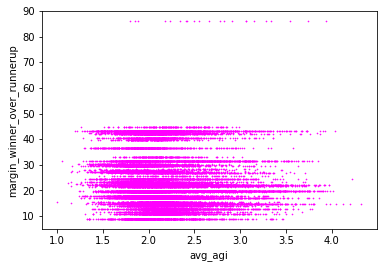

In [22]:
resultF.plot.scatter("avg_agi", "margin_winner_over_runnerup", s=.4, c = "magenta")


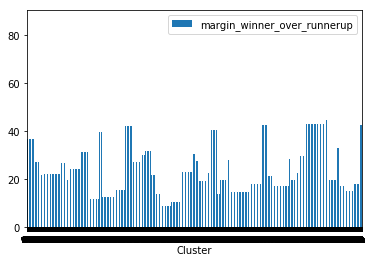

In [23]:
resultF.plot.bar(x= "Cluster", y ="margin_winner_over_runnerup")


In [ ]:
resultF.plot.bar(x= "state", y ="margin_winner_over_runnerup", title = "Average Margin of Winning Candidate over the Runnerup in the 2008 Election",linewidth=4.0,figsize=(15, 10), width = .7, colormap = "Accent")



In [ ]:
resultF.plot.scatter(x = "avg_agi", y = "margin_winner_over_runnerup", c = "magenta")

